# Dxy, $\pi$ and Gmin analysis on sympatric populations

Based on chapter X of the paper I reperform the Dxy, $\pi$ and Gmin analysis on sympatric phase2 populations of: Burkina Faso, Ghana and Guinea.
I used two old Alistair's notebooks:

- <b> 20150528 Haplotype distance scan - compute distance matrices</b> For computing Dxy distances, I compute these distances on windows of 100kbp in the two cromosomal arm 3L and 3R.
- <b> 20150529 Haplotype distance scan - 2 population plots </b> For plotting Dxy, $\pi$ and Gmin over the chromosome

### Import modules for the analysis:

In [1]:
import os
import allel
import zarr
import pandas as pd
import h5py
import petl as etl
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import h5py
import pyfasta
import bcolz
import glob
import itertools

In [2]:
#From imports of Alistair
import sys
import gc
import datetime
import humanize
from humanize import naturalsize, intcomma, intword


def log(*msg):
    print(' '.join(map(str, msg)), file=sys.stdout)
    sys.stdout.flush()
    
from contextlib import contextmanager

@contextmanager
def timer(*msg):
    before = datetime.datetime.now()
    try:
        yield
    except:
        after = datetime.datetime.now()
        elapsed = (after - before).total_seconds()
        done = 'errored after %s' % humanize.naturaldelta(elapsed)
        if not msg:
            msg = done
        else:
            msg = ', '.join(map(str, msg)) + ', ' + done
        print(msg, file=sys.stderr)
        sys.stderr.flush()   
        raise
    else:
        after = datetime.datetime.now()
        elapsed = (after - before).total_seconds()
        done = 'done in %s' % humanize.naturaldelta(elapsed)
        if not msg:
            msg = done
        else:
            msg = ', '.join(map(str, msg)) + ', ' + done
        print(msg, file=sys.stdout)
        sys.stdout.flush()

Import metadata, genome and accessibility:

In [3]:
tbl_samples = pd.read_csv("/mnt/70D89269D8922CFA/Genomes/meta/samples.meta.txt", sep = "\t")
tbl_samples

ox_code         src_code population        country       region  \
0     AA0040-C  Twifo_Praso__E2      GHcol          Ghana  Twifo_Praso   
1     AA0041-C  Twifo_Praso__H3      GHcol          Ghana  Twifo_Praso   
2     AA0042-C      Takoradi_C7      GHcol          Ghana     Takoradi   
3     AA0043-C      Takoradi_H8      GHcol          Ghana     Takoradi   
4     AA0044-C     Takoradi_D10      GHcol          Ghana     Takoradi   
5     AA0048-C        Madina_A1      GHgam          Ghana       Madina   
6     AA0049-C        Madina_E3      GHcol          Ghana       Madina   
7     AA0050-C        Madina_E5      GHgam          Ghana       Madina   
8     AA0051-C  Twifo_Praso__C1      GHcol          Ghana  Twifo_Praso   
9     AA0052-C  Twifo_Praso__F2      GHcol          Ghana  Twifo_Praso   
10    AA0053-C  Twifo_Praso__A4      GHcol          Ghana  Twifo_Praso   
11    AA0054-C      Takoradi_E7      GHcol          Ghana     Takoradi   
12    AA0055-C      Takoradi_B9      GHcol          Ghana     Takoradi   
13    AA0056-C     Takoradi_G10      GHcol          Ghana     Takoradi   
14    AA0060-C        Madina_C1      GHgam          Ghana       Madina   
15    AA0061-C        Madina_F3      GHgam          Ghana       Madina   
16    AA0063-C  Twifo_Praso__D1      GHcol          Ghana  Twifo_Praso   
17    AA0064-C  Twifo_Praso__G2      GHcol          Ghana  Twifo_Praso   
18    AA0066-C      Takoradi_G7      GHcol          Ghana     Takoradi   
19    AA0067-C      Takoradi_C9      GHcol          Ghana     Takoradi   
20    AA0068-C     Takoradi_H10      GHcol          Ghana     Takoradi   
21    AA0072-C        Madina_F1      GHgam          Ghana       Madina   
22    AA0073-C        Madina_H3      GHcol          Ghana       Madina   
23    AA0074-C        Madina_G5      GHcol          Ghana       Madina   
24    AA0075-C  Twifo_Praso__F1      GHcol          Ghana  Twifo_Praso   
25    AA0076-C  Twifo_Praso__B3      GHcol          Ghana  Twifo_Praso   
26    AA0077-C  Twifo_Praso__C4      GHcol          Ghana  Twifo_Praso   
27    AA0080-C     Takoradi_A11      GHcol          Ghana     Takoradi   
28    AA0084-C        Madina_A2      GHgam          Ghana       Madina   
29    AA0085-C        Madina_A4      GHgam          Ghana       Madina   
...        ...              ...        ...            ...          ...   
1112  AY0056-C        Tia_aPM_8      CIcol  Cote d'Ivoire     Tiassale   
1113  AY0057-C       Tia_aPM_17      CIcol  Cote d'Ivoire     Tiassale   
1114  AY0058-C       Tia_aPM_25      CIcol  Cote d'Ivoire     Tiassale   
1115  AY0059-C       Tia_aPM_36      CIcol  Cote d'Ivoire     Tiassale   
1116  AY0060-C       Tia_aPM_30      CIcol  Cote d'Ivoire     Tiassale   
1117  AY0061-C        Tia_dPM_3      CIcol  Cote d'Ivoire     Tiassale   
1118  AY0062-C       Tia_dPM_10      CIcol  Cote d'Ivoire     Tiassale   
1119  AY0063-C       Tia_dPM_18      CIcol  Cote d'Ivoire     Tiassale   
1120  AY0064-C       Tia_dPM_25      CIcol  Cote d'Ivoire     Tiassale   
1121  AY0065-C       Tia_dPM_48      CIcol  Cote d'Ivoire     Tiassale   
1122  AY0066-C       Tia_dPM_54      CIcol  Cote d'Ivoire     Tiassale   
1123  AY0067-C        Tia_aPM_6      CIcol  Cote d'Ivoire     Tiassale   
1124  AY0068-C       Tia_aPM_15      CIcol  Cote d'Ivoire     Tiassale   
1125  AY0069-C       Tia_aPM_24      CIcol  Cote d'Ivoire     Tiassale   
1126  AY0070-C       Tia_aPM_35      CIcol  Cote d'Ivoire     Tiassale   
1127  AY0072-C        Tia_dPM_2      CIcol  Cote d'Ivoire     Tiassale   
1128  AY0074-C       Tia_dPM_17      CIcol  Cote d'Ivoire     Tiassale   
1129  AY0076-C       Tia_dPM_47      CIcol  Cote d'Ivoire     Tiassale   
1130  AY0077-C       Tia_dPM_53      CIcol  Cote d'Ivoire     Tiassale   
1131  AY0078-C        Tia_aPM_5      CIcol  Cote d'Ivoire     Tiassale   
1132  AY0079-C       Tia_aPM_14      CIcol  Cote d'Ivoire     Tiassale   
1133  AY0080-C       Tia_aPM_23      CIcol  Cote d'Ivoire     Tiassale   
1134  AY008

In [88]:
fasta_fn = '/mnt/70D89269D8922CFA/Genomes/genome/Anopheles-gambiae-PEST_CHROMOSOMES_AgamP3.fa'
genome = pyfasta.Fasta(fasta_fn, key_fn=lambda k: k.split()[0])

In [89]:
sorted(genome.keys())

['2L', '2R', '3L', '3R', 'UNKN', 'X', 'Y_unplaced']

In [91]:
accessibility_fn = '/mnt/70D89269D8922CFA/Genomes/extras/accessibility.h5'
accessibility = h5py.File(accessibility_fn, mode='r')

-----------------------------------------------------

## DXY pairwise calc

Setting output folder, where my distances will be stored:

In [92]:
dist_dn_template = os.path.join('/mnt/70D89269D8922CFA/Genomes/extras/dist_haps')
dist_fn_template = '{chrom}.{start:08d}.{stop:08d}.npy'

Define function for distances calculations:

In [12]:
def compute_dxy_distance_matrices(chrom, window_size):
    dist_dn = dist_dn_template.format(metric='dxy', window_size=window_size)
    if not os.path.exists(dist_dn):
        os.makedirs(dist_dn)
        
    # open haplotypes
    callset = zarr.open(phase2happath)
    
    # load accessibility map
    is_accessible = accessibility[chrom]['is_accessible'][:]
    
    # determine accessible positions
    pos_accessible, = np.nonzero(is_accessible)
    
    # define equally accessible windows
    window_starts = pos_accessible[0:None:window_size]
    window_stops = pos_accessible[window_size-1:None:window_size]
    
    # add final window to end of chromosome
    window_starts = np.append(window_starts, [window_stops[-1] + 1])
    window_stops = np.append(window_stops, [len(genome[chrom])])
    
    # load variant positions
    pos = allel.SortedIndex(calldata_hap_phase2[chrom]['variants']['POS'][:])

    # iterate over windows
    for window_start, window_stop in zip(window_starts, window_stops):
        
        # distance matrix file name
        dist_fn = dist_fn_template.format(chrom=chrom, start=window_start, stop=window_stop)
        dist_path = os.path.join(dist_dn, dist_fn)
        
        # stay dry
        if os.path.exists(dist_path):
            log('skipping', dist_path)
            
        else:
            log('building', dist_path)
            gc.collect()
            
            with timer():
                
                # locate the window
                loc = pos.locate_range(window_start, window_stop)
                print (loc.start, loc.stop)

                # load data
                genotypes_phase2_call = calldata_hap_phase2[chrom]["calldata/GT"]
                genotypes_phase2 = allel.GenotypeChunkedArray(genotypes_phase2_call[loc])
                haplotypes = genotypes_phase2.to_haplotypes()
                n_variants = genotypes_phase2.shape[0]
                log('variants:', n_variants)


                # compute hamming distance
                dist = allel.pairwise_distance(haplotypes[:], metric='hamming')
                log('hamming distance, max:', dist.max(), ', min:', dist.min())

                # adjust by accessible window size
                n_bases = np.count_nonzero(is_accessible[window_start:window_stop+1])
                log('window accessible size:', n_bases)
                dist = dist * n_variants / n_bases
                log('dxy distance, max:', dist.max(), ', min:', dist.min())

                # save
                np.save(dist_path, dist)

Calculate distances on the two comosomal arm 3L and 3R with 100kbp windows:

In [15]:
dxy_3L = compute_dxy_distance_matrices('3L', 100000)

skipping dist_haps/3L.00009778.00730787.npy
skipping dist_haps/3L.00730788.01243275.npy
skipping dist_haps/3L.01243276.01622713.npy
skipping dist_haps/3L.01622714.01833911.npy
skipping dist_haps/3L.01833912.01989789.npy
skipping dist_haps/3L.01989790.02108439.npy
skipping dist_haps/3L.02108440.02239834.npy
skipping dist_haps/3L.02239835.02412740.npy
skipping dist_haps/3L.02412741.02586161.npy
skipping dist_haps/3L.02586162.02773590.npy
skipping dist_haps/3L.02773591.02919374.npy
skipping dist_haps/3L.02919375.03073996.npy
skipping dist_haps/3L.03073997.03235327.npy
skipping dist_haps/3L.03235328.03378695.npy
skipping dist_haps/3L.03378696.03487521.npy
skipping dist_haps/3L.03487522.03595558.npy
skipping dist_haps/3L.03595559.03719733.npy
skipping dist_haps/3L.03719734.03884028.npy
skipping dist_haps/3L.03884029.04028601.npy
skipping dist_haps/3L.04028602.04210838.npy
skipping dist_haps/3L.04210839.04880931.npy
skipping dist_haps/3L.04880932.05102740.npy
skipping dist_haps/3L.05102741.0

In [16]:
dxy_3R = compute_dxy_distance_matrices('3R', 100000)

skipping dist_haps/3R.00000020.00134416.npy
skipping dist_haps/3R.00134417.00243509.npy
skipping dist_haps/3R.00243510.00352301.npy
skipping dist_haps/3R.00352302.00473621.npy
skipping dist_haps/3R.00473622.00577607.npy
skipping dist_haps/3R.00577608.00690433.npy
skipping dist_haps/3R.00690434.00801223.npy
skipping dist_haps/3R.00801224.00915204.npy
skipping dist_haps/3R.00915205.01030193.npy
skipping dist_haps/3R.01030194.01147657.npy
skipping dist_haps/3R.01147658.01270736.npy
skipping dist_haps/3R.01270737.01395739.npy
skipping dist_haps/3R.01395740.01525501.npy
skipping dist_haps/3R.01525502.01647090.npy
skipping dist_haps/3R.01647091.01767431.npy
skipping dist_haps/3R.01767432.01903815.npy
skipping dist_haps/3R.01903816.02013366.npy
skipping dist_haps/3R.02013367.02125220.npy
skipping dist_haps/3R.02125221.02333172.npy
skipping dist_haps/3R.02333173.02447612.npy
skipping dist_haps/3R.02447613.02564468.npy
skipping dist_haps/3R.02564469.02677460.npy
skipping dist_haps/3R.02677461.0

--------------------------------

## DXY plotting

In [17]:
palette = sns.color_palette()

In [18]:
distscan_dir = '/mnt/70D89269D8922CFA/Genomes/extras/dist_haps/'
!ls -lh {distscan_dir}* | head

-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:20 dist_haps/3L.00009778.00730787.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:21 dist_haps/3L.00730788.01243275.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:21 dist_haps/3L.01243276.01622713.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:22 dist_haps/3L.01622714.01833911.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:23 dist_haps/3L.01833912.01989789.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:23 dist_haps/3L.01989790.02108439.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:24 dist_haps/3L.02108440.02239834.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:25 dist_haps/3L.02239835.02412740.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:25 dist_haps/3L.02412741.02586161.npy
-rw-r--r-- 1 beniamino kwiat-cluster-users 21M Sep 13 11:26 dist_haps/3L.02586162.02773590.npy
ls: write error: Broken pipe


In [124]:
def open_dscan(chrom):

    # find the underlying matrix file names, we need these to get window boundaries
    dfns = sorted(glob.glob(os.path.join(distscan_dir, chrom + '*.npy')))
    bnms = [os.path.basename(f) for f in dfns]
    windows = np.array([[int(b.split('.')[1]), int(b.split('.')[2])] for b in bnms])
    n_windows = len(windows)
    log(n_windows, 'windows')

    # compile into a single array
    dscan_rootdir = os.path.join(distscan_dir, '%s.bcolz' % chrom)
    if not os.path.exists(dscan_rootdir):
        log('loading', dscan_rootdir)

        # load up the first matrix to determine shape
        d = np.load(dfns[0])
        n_pairs = d.shape[0]
        
        log(n_pairs, 'pairs')

        # setup bcolz array
        dscan = bcolz.carray(np.empty((0, n_pairs), dtype='f4'), 
                             cparams=bcolz.cparams(cname='zlib', clevel=1),
                             rootdir=dscan_rootdir,
                             mode='w',
                             expectedlen=n_windows)

        # load one row at a time
        for i, dfn in enumerate(dfns):
            if i > 0 and i % 20 == 0:
                log(i, dfn)
            dscan.append(np.load(dfn, mmap_mode='r'))
            dscan.flush()
        
    # open/re-open in read-only mode
    dscan = bcolz.carray(rootdir=dscan_rootdir, mode='r')

    return windows, dscan

In [125]:
def sample_to_haplotype_indices(sidx):
    return list(itertools.chain(*[[ix*2, ix*2+1] for ix in sidx])) 

In [126]:
def extract_2pop_dscan(chrom, pop1, pop2):

    callset = zarr.group(phase2happath)
    samples = [str(s, 'ascii') for s in callset['samples'][:]]
    n_samples = len(samples)
    n_haplotypes = 2 * n_samples
    
    # load dscan
    windows, dscan = open_dscan(chrom)

    # locate sample indices
    pop1_sample_indices=tbl_samples.population[tbl_samples.population == pop1].index.tolist()
    pop2_sample_indices=tbl_samples.population[tbl_samples.population == pop2].index.tolist()

    # locate haplotype indices
    pop1_haplotype_indices = sample_to_haplotype_indices(pop1_sample_indices)
    pop2_haplotype_indices = sample_to_haplotype_indices(pop2_sample_indices)
    
    # locate indices of pairwise comparisons within and between populations
    dw1_ix = allel.condensed_coords_within(pop1_haplotype_indices, n_haplotypes)
    dw2_ix = allel.condensed_coords_within(pop2_haplotype_indices, n_haplotypes)
    db_ix = allel.condensed_coords_between(pop1_haplotype_indices, pop2_haplotype_indices, n_haplotypes)
    
    # extract pairwise distances
    dw1 = allel.chunked.core.take(dscan, dw1_ix, axis=1)[:]
    dw2 = allel.chunked.core.take(dscan, dw2_ix, axis=1)[:]
    db = allel.chunked.core.take(dscan, db_ix, axis=1)[:]
    
   
    return windows, dw1, dw2, db


In [127]:
def plot_dist_scan(windows, d, ylim=(0, 0.016), title=None, color=None, ax=None):
    
    # set up figure
    if ax is None:
        fig, ax = subplots(figsize=(8, 1.5))
    if title is not None:
        ax.set_title(title, fontweight='bold')

    # window centres
    x = np.array(windows).mean(axis=1)

    # median
    y = np.median(d, axis=1)
    ax.plot(x, y, color=color, lw=1)
    
    # interquartile range
    y1 = np.percentile(d, 25, axis=1)
    y2 = np.percentile(d, 75, axis=1)
    ax.fill_between(x, y1, y2, color=color, alpha=.6)
    
    # 5-95 range
    y1 = np.percentile(d, 5, axis=1)
    y2 = np.percentile(d, 95, axis=1)
    ax.fill_between(x, y1, y2, color=color, alpha=.4)
    
    # total range
    y1 = d.min(axis=1)
    y2 = d.max(axis=1)
    ax.fill_between(x, y1, y2, color=color, alpha=.2)
    
    # tidy up
    ax.set_ylim(*ylim)
    
    # legend
    handles = list()
    # median
    l = plt.Line2D([], [], color=color, linestyle='-', linewidth=2, label='median')
    handles.append(l)
    # percentiles
    r = plt.Rectangle([0, 0], 1, 1, color=color, alpha=.6, lw=0, label='25-75th percentiles')
    handles.append(r)
    r = plt.Rectangle([0, 0], 1, 1, color=color, alpha=.4, lw=0, label='5-95th percentiles')
    handles.append(r)
    r = plt.Rectangle([0, 0], 1, 1, color=color, alpha=.2, lw=0, label='min-max')
    handles.append(r)
    ax.legend(handles=handles, bbox_to_anchor=[1, 1], loc='upper left')    
    ax.set_yticks([0, .005, .01, .015])
    ax.set_xlim(0, windows[-1, -1])
    

In [128]:
def plot_gmin(windows, d, title=None, ax=None):
    
    # set up figure
    if ax is None:
        fig, ax = subplots(figsize=(8, 1.5))
    if title is not None:
        ax.set_title(title, fontweight='bold')

    # window centres
    x = np.array(windows).mean(axis=1)

    # Gmin
    y = d.min(axis=1) / d.mean(axis=1)
    ax.plot(x, y, color='k', lw=1, linestyle='-')
        
    # tidy up
    ax.set_ylabel(r'$G_{min}$', rotation=0, ha='right', va='center')
    ax.set_xlim(0, windows[-1, -1])
    ax.set_ylim(0, 1)
    ax.set_yticks([0, 1])

In [129]:
autosomes = ['3L', '3R']

In [130]:
def run_2pop_analysis(pop1, pop2):
    for chrom in autosomes:
        fig = plt.figure(figsize=(13, 11))
        windows, dw1, dw2, db = extract_2pop_dscan(chrom, pop1, pop2)
        
        ax = fig.add_subplot(4, 1, 1)
        sns.despine(ax=ax, bottom=True, offset=5)
        plot_dist_scan(windows, dw1, title='%s, %s' % (pop1, chrom), color=palette[0], ax=ax)
        ax.set_xticks([])
        ax.set_ylabel(r'$\pi$', rotation=0, ha='right', va='center')
        
        ax = fig.add_subplot(4, 1, 2)
        sns.despine(ax=ax, bottom=True, offset=5)
        plot_dist_scan(windows, dw2, title='%s, %s' % (pop2, chrom), color=palette[1], ax=ax)
        ax.set_xticks([])
        ax.set_ylabel(r'$\pi$', rotation=0, ha='right', va='center')
        
        ax = fig.add_subplot(4, 1, 3)
        sns.despine(ax=ax, bottom=True, offset=5)
        plot_dist_scan(windows, db, title='%s/%s, %s' % (pop1, pop2, chrom), color=palette[2], ax=ax)
        ax.set_xticks([])
        ax.set_ylabel(r'$d_{XY}$', rotation=0, ha='right', va='center')

        ax = fig.add_subplot(4, 1, 4)
        sns.despine(ax=ax, offset=5)
        plot_gmin(windows, db, title='%s/%s, %s' % (pop1, pop2, chrom), ax=ax)
        ax.set_xlabel('position (bp)')
        
        fig.tight_layout()
        plt.show()

250 windows


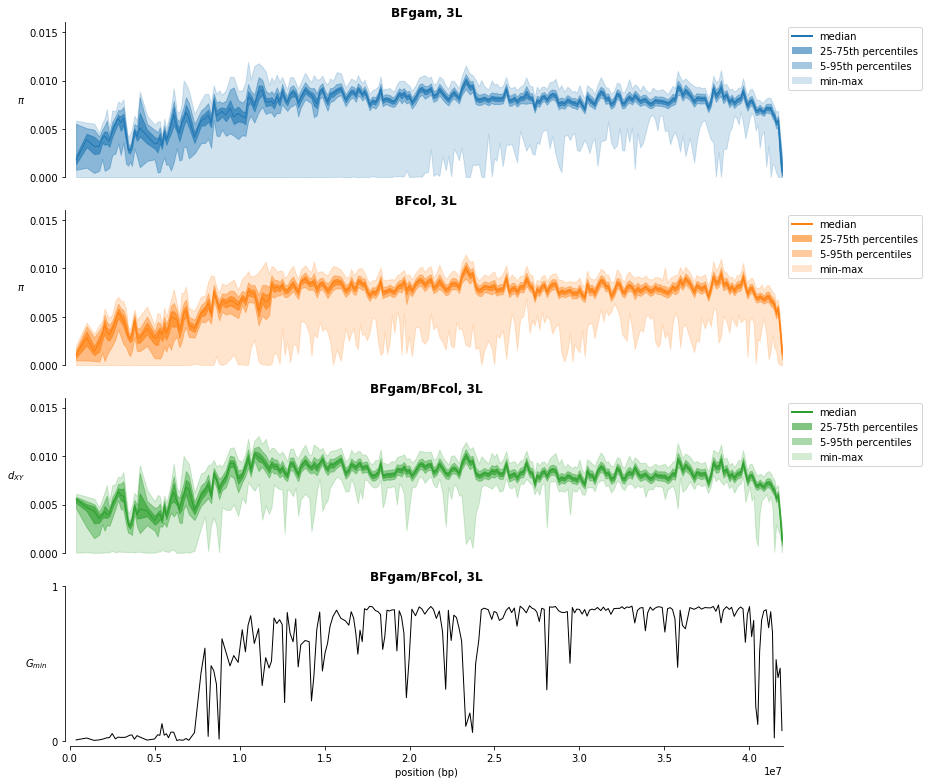

325 windows


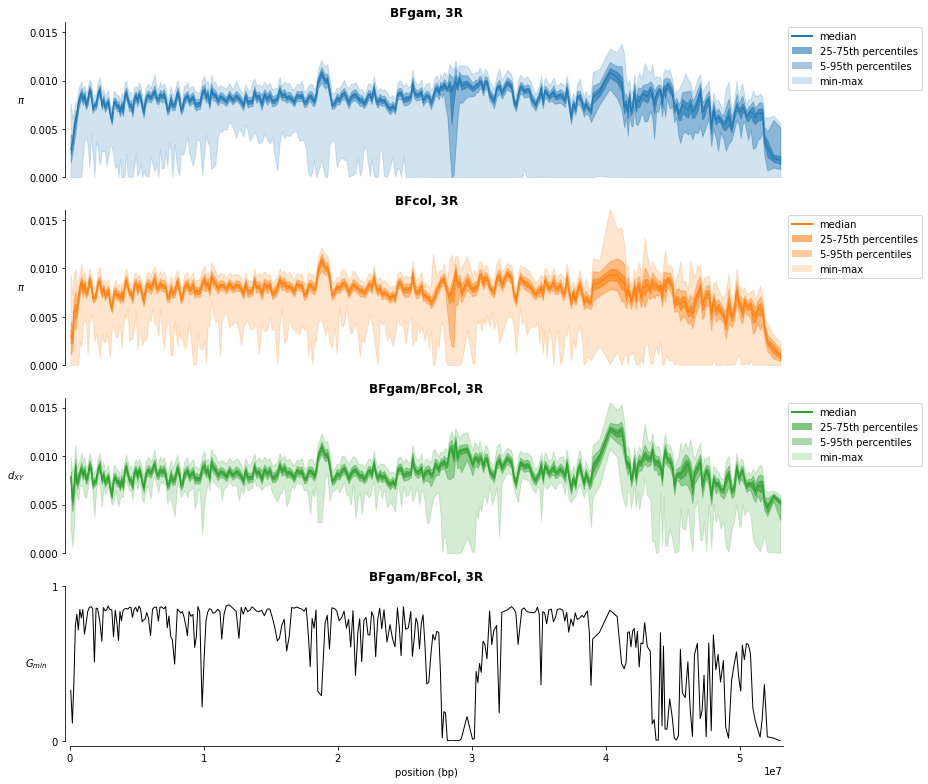

In [132]:
run_2pop_analysis('BFgam', 'BFcol')

250 windows


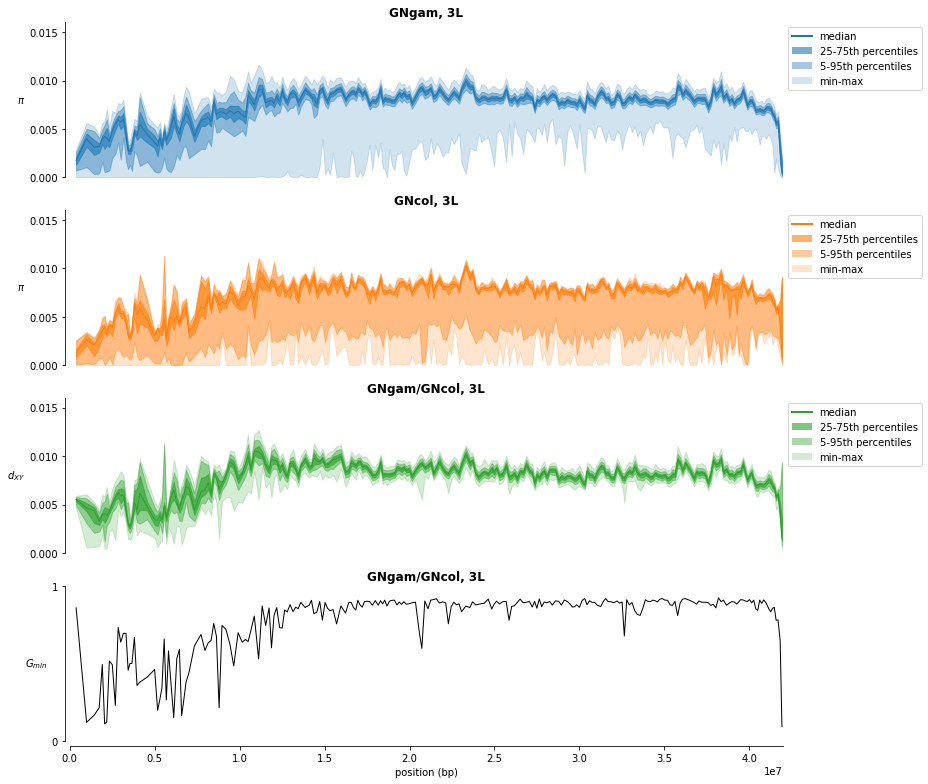

325 windows


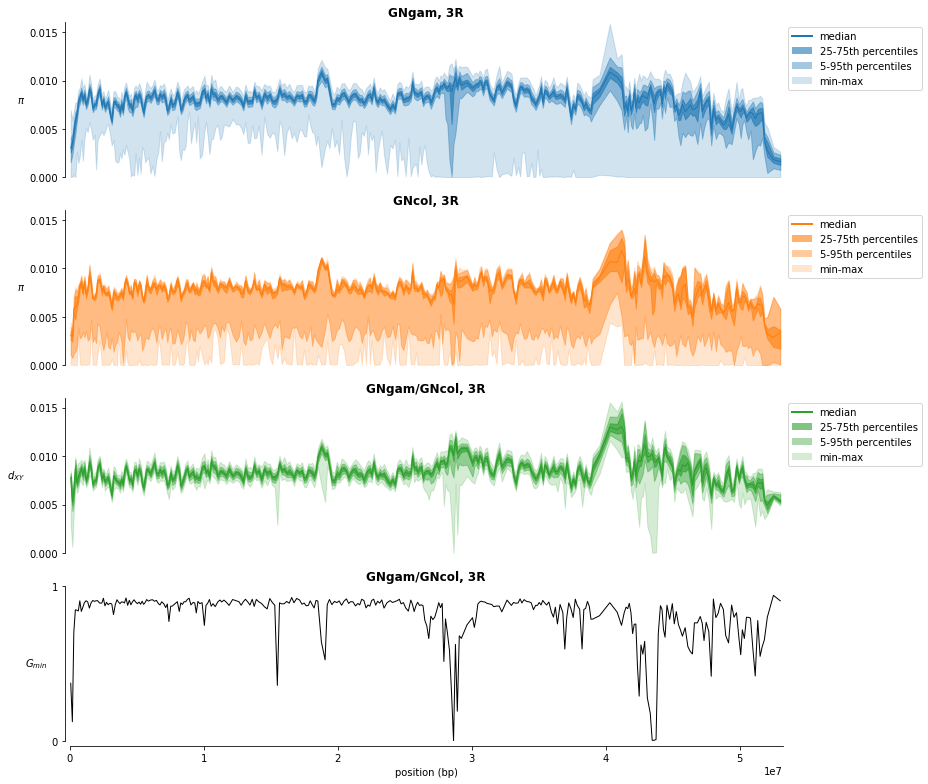

In [131]:
run_2pop_analysis('GNgam', 'GNcol')

250 windows


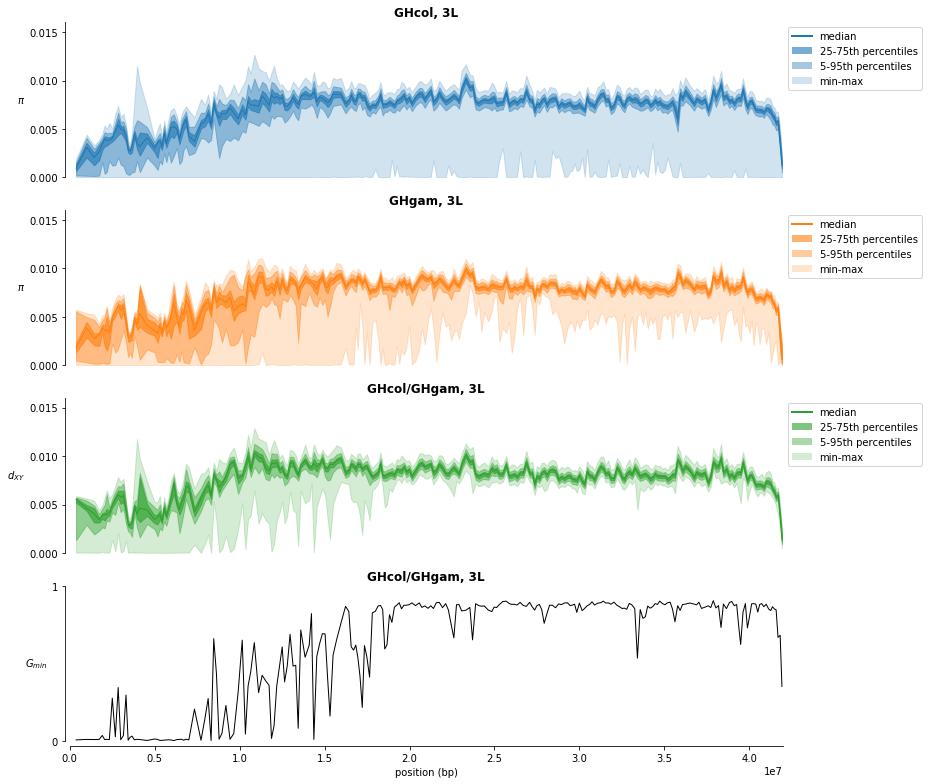

325 windows


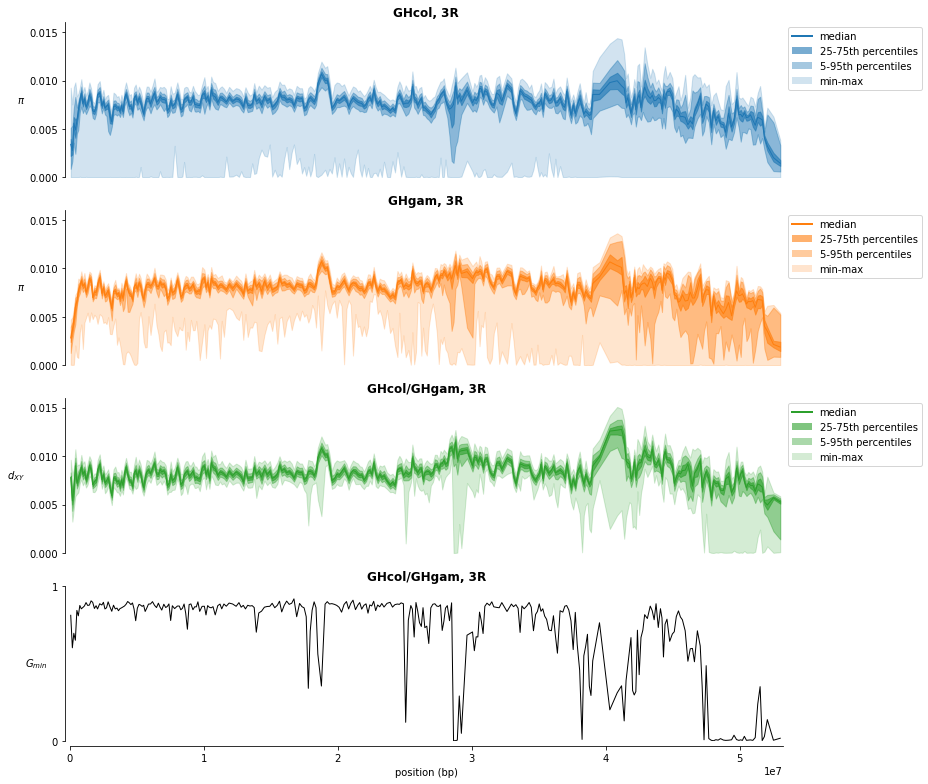

In [133]:
run_2pop_analysis('GHcol', 'GHgam')